# XGBoost feature importance

In [2]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv("pima-indians-diabetes.data.csv", header=None)
features = data.loc[:,0:7]
labels = data.loc[:,8]

Splitting data for cross-validation:

In [4]:
seed, test_size = 7, 0.33
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
                                                   test_size=test_size,
                                                   random_state=seed)

In [5]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [6]:
print(model.feature_importances_)

[ 0.07094595  0.1858108   0.08952703  0.08445946  0.07263514  0.16047297
  0.12837838  0.20777027]


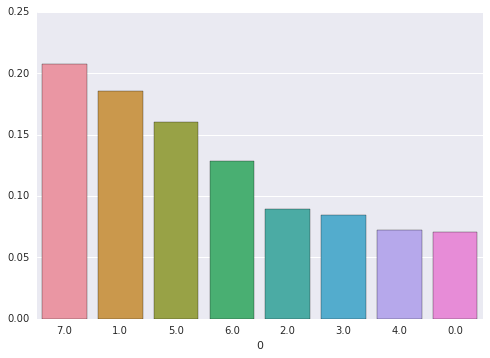

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances = pd.DataFrame([range(len(model.feature_importances_)),model.feature_importances_]).T
ftr_importances = ftr_importances.sort_values(by=1, ascending=0)

sns.barplot(x=ftr_importances[0], y=ftr_importances[1].values)
plt.xticks(range(0, len(ftr_importances)), ftr_importances[0].values);

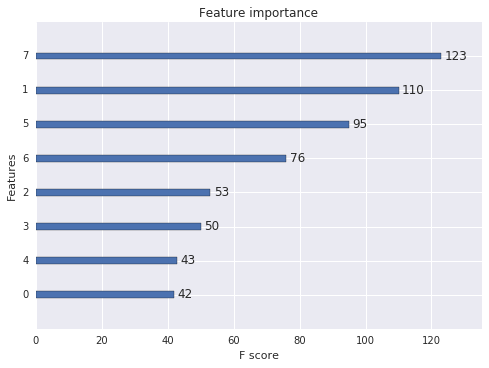

In [9]:
from xgboost import plot_importance
plot_importance(model)

We can use `SelectFromModel` from `sklearn` to generate a new training data set, with the best features retained, based on a threshold on feature importance. To select the best value for the threshold, we can iterate through a selection of thresholds:

In [13]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(model.feature_importances_)

for threshold in thresholds:
    # Select the best features from an initial pre-fit model
    selection = SelectFromModel(model, threshold=threshold, prefit=True)
    X_train_select = selection.transform(X_train)
    
    # Train a new model using the best features selected
    selection_model = XGBClassifier()
    selection_model.fit(X_train_select, Y_train)
    
    # Transform the test data to include the best features
    X_test_select = selection.transform(X_test)
    
    # Make predictions using the new model
    Y_pred = selection_model.predict(X_test_select)
    predictions = [round(value) for value in Y_pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Threshold: %.3f, n=%d, accuracy: %.2f %%" % (threshold, X_train_select.shape[1], accuracy*100.0))

Threshold: 0.071, n=8, accuracy: 77.95 %
Threshold: 0.073, n=7, accuracy: 76.38 %
Threshold: 0.084, n=6, accuracy: 77.56 %
Threshold: 0.090, n=5, accuracy: 76.38 %
Threshold: 0.128, n=4, accuracy: 76.38 %
Threshold: 0.160, n=3, accuracy: 74.80 %
Threshold: 0.186, n=2, accuracy: 71.65 %
Threshold: 0.208, n=1, accuracy: 63.78 %
